# Dermoscopic classification

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import csv
import math
from PIL import Image

# Read the dataset information from the file and process it

In [124]:
filepath = 'PH2_dataset.txt'  
with open(filepath) as fp:
    reader = csv.reader(fp, delimiter='|')
    csv_list = []
    for row in reader:
        row = [x.strip(' ') for x in list(filter(None, row))]
        if row == []:
            break;
        csv_list.append(row)

In [125]:
data = pd.DataFrame(csv_list[1:])
data.columns = csv_list[:1]
colors = data['Colors']
colors_list = []

for item in list(colors.get_values()):
    reader = csv.reader(item, delimiter=' ')
    for row in reader:
        row = list(filter(None, row))
        vector = [0, 0, 0, 0, 0, 0]
        for x in row:
            vector[int(x) - 1] = 1
        colors_list.append(vector)

name_column = data['Name']

diagnosis_column = data['Clinical Diagnosis']
data = data.drop('Histological Diagnosis', axis = 1).drop('Colors', axis = 1).drop('Name', axis = 1).drop('Clinical Diagnosis', axis = 1)

color_columns = ['White', 'Red', 'Light-Brow', 'Dark-Brown', 'Blue-Gray', 'Black']
colors_data = pd.DataFrame(colors_list)
colors_data.columns = color_columns

columns = [x[0] for x in data.columns.values]
columns += color_columns

data = data.join(colors_data)

data.columns = columns

C:\Users\dgladkov\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [126]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
binary_columns = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] == 2]

print(binary_columns)

dict = {'A' : 0, 'P' : 1, 'T' : 0, 'AT' : 1} 

for col in binary_columns:
    data[col] = [dict[x] for x in data[col]]

['Pigment Network', 'Streaks', 'Regression Areas', 'Blue-Whitish Veil']


In [127]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
non_binary_columns = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] > 2]

data_nonbinary = pd.get_dummies(data[non_binary_columns])
data = data.drop(non_binary_columns, axis = 1)
print(data_nonbinary.columns)

Index(['Asymmetry_0', 'Asymmetry_1', 'Asymmetry_2', 'Dots/Globules_A',
       'Dots/Globules_AT', 'Dots/Globules_T'],
      dtype='object')


In [128]:
data = pd.concat((data_nonbinary, data), axis = 1)

# Visualize PH2 dataset images

In [129]:
cn_names_list = []
atn_names_list = []
m_names_list = []

for idx, diag in enumerate(diagnosis_column.get_values()):
    if diag == '0':
        cn_names_list.append(name_column.get_values()[idx][0])
    elif diag == '1':
        atn_names_list.append(name_column.get_values()[idx][0])
    elif diag == '2':
        m_names_list.append(name_column.get_values()[idx][0])

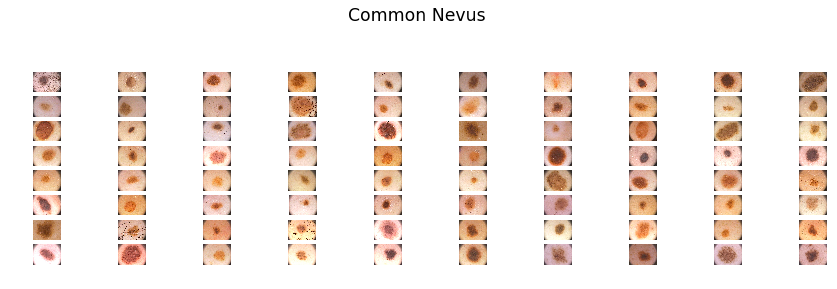

In [130]:
columns = 10
rows = 20

fig = plt.figure(figsize=(15, 9))
i = 0
for name in cn_names_list:
    full_filename = 'PH2 Dataset images\\' + name + '\\' + name + '_Dermoscopic_Image\\' + name + '.bmp'
    axes = fig.add_subplot(rows, columns, i + 1)
    plt.imshow(Image.open(full_filename), cmap='gray')
    plt.axis('off')
    i += 1

plt.suptitle('Common Nevus', fontsize='xx-large')
plt.show()

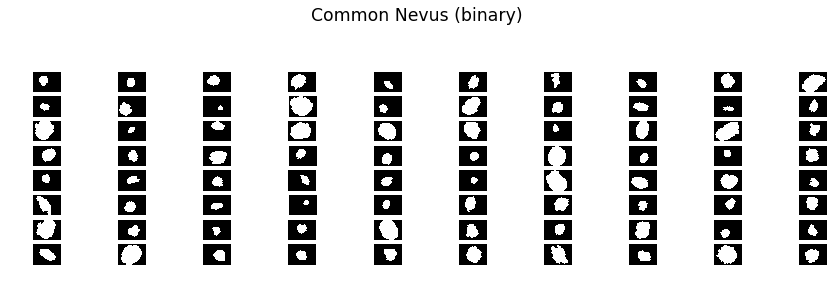

In [131]:
columns = 10
rows = 20

fig = plt.figure(figsize=(15, 9))
i = 0
for name in cn_names_list:
    full_filename = 'PH2 Dataset images\\' + name + '\\' + name + '_lesion\\' + name + '_lesion.bmp'
    axes = fig.add_subplot(rows, columns, i + 1)
    plt.imshow(Image.open(full_filename), cmap='gray')
    plt.axis('off')
    i += 1

plt.suptitle('Common Nevus (binary)', fontsize='xx-large')
plt.show()

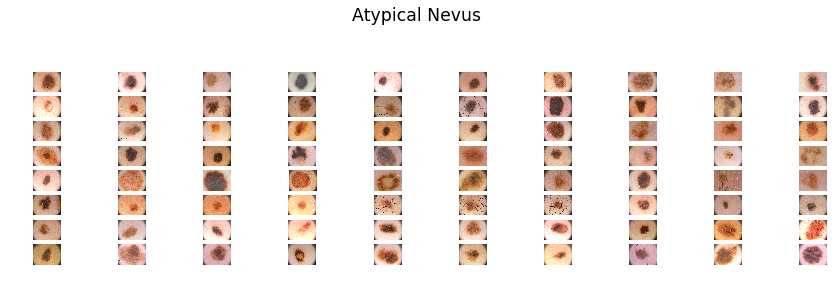

In [132]:
columns = 10
rows = 20

fig = plt.figure(figsize=(15, 9))
i = 0
for name in atn_names_list:
    full_filename = 'PH2 Dataset images\\' + name + '\\' + name + '_Dermoscopic_Image\\' + name + '.bmp'
    axes = fig.add_subplot(rows, columns, i + 1)
    plt.imshow(Image.open(full_filename), cmap='gray')
    plt.axis('off')
    i += 1

plt.suptitle('Atypical Nevus', fontsize='xx-large')
plt.show()

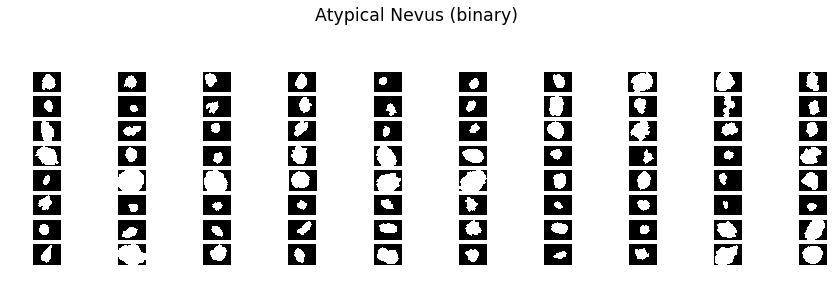

In [133]:
columns = 10
rows = 20

fig = plt.figure(figsize=(15, 9))
i = 0
for name in atn_names_list:
    full_filename = 'PH2 Dataset images\\' + name + '\\' + name + '_lesion\\' + name + '_lesion.bmp'
    axes = fig.add_subplot(rows, columns, i + 1)
    plt.imshow(Image.open(full_filename), cmap='gray')
    plt.axis('off')
    i += 1

plt.suptitle('Atypical Nevus (binary)', fontsize='xx-large')
plt.show()

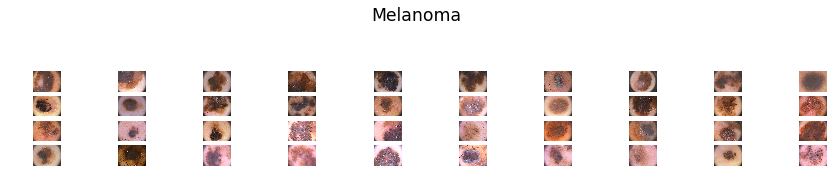

In [134]:
columns = 10
rows = 20

fig = plt.figure(figsize=(15, 9))
i = 0
for name in m_names_list:
    full_filename = 'PH2 Dataset images\\' + name + '\\' + name + '_Dermoscopic_Image\\' + name + '.bmp'
    axes = fig.add_subplot(rows, columns, i + 1)
    plt.imshow(Image.open(full_filename), cmap='gray')
    plt.axis('off')
    i += 1

plt.suptitle('Melanoma', fontsize='xx-large')
plt.show()

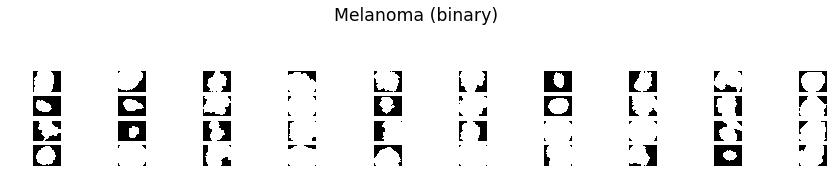

In [135]:
columns = 10
rows = 20

fig = plt.figure(figsize=(15, 9))
i = 0
for name in m_names_list:
    full_filename = 'PH2 Dataset images\\' + name + '\\' + name + '_lesion\\' + name + '_lesion.bmp'
    axes = fig.add_subplot(rows, columns, i + 1)
    plt.imshow(Image.open(full_filename), cmap='gray')
    plt.axis('off')
    i += 1

plt.suptitle('Melanoma (binary)', fontsize='xx-large')
plt.show()

# Calculate HU Moments

In [136]:
hu_moments_list = []

for name in name_column.get_values():
    filename = name[0]
    full_filename = 'PH2 Dataset images\\' + filename + '\\' + filename + '_lesion\\' + filename + '_lesion.bmp'
    im = cv2.imread(full_filename, cv2.IMREAD_GRAYSCALE)
    _,im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)
    
    # Calculate Moments
    moments = cv2.moments(im)
    # Calculate Hu Moments
    huMoments = cv2.HuMoments(moments)
    
    hu_moments = []
    
    for i in range(0,7):
        huMoments[i] = -1 * math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))
        hu_moments.append(huMoments[i][0])

    hu_moments_list.append(hu_moments)

In [137]:
hu_moments_data = pd.DataFrame(hu_moments_list)
hu_moments_data.columns = ['HU_' + str(x) for x in range(0,7)]
hu_moments_data

,HU_0,HU_1,HU_2,HU_3,HU_4,HU_5,HU_6
0,3.192882,8.304020,11.094966,13.350252,25.931915,17.958631,25.618989
1,3.201074,8.378782,11.610410,14.114733,-27.217112,-18.589757,-27.064728
2,3.185898,7.638648,11.051059,12.858509,24.818180,16.752583,25.639564
3,3.187095,7.719609,12.103351,13.637487,27.068577,-17.547634,26.524982
4,3.130416,6.817040,11.974570,12.886271,25.416652,16.473349,25.533221
5,3.165284,7.201369,11.278086,12.720447,25.446991,18.429414,24.727475
6,3.062078,6.590145,10.034232,10.876258,21.424366,14.245857,-21.560739
7,3.169989,7.279029,12.074735,12.545289,24.902464,16.210863,25.210029
8,3.195953,8.231827,11.949310,15.026758,-28.953900,-19.179541,28.545624
9,3.145494,6.961098,11.207777,12.163640,23.937928,15.851015,-24.086845


In [138]:
#Normalize

hu_moments_data = (hu_moments_data - hu_moments_data.mean(axis = 0))/hu_moments_data.std(axis = 0)

In [139]:
data = pd.concat((data, hu_moments_data), axis = 1)

# Show the final processed dataset

In [140]:
data

,Asymmetry_0,Asymmetry_1,Asymmetry_2,Dots/Globules_A,Dots/Globules_AT,Dots/Globules_T,Pigment Network,Streaks,Regression Areas,Blue-Whitish Veil,...,Dark-Brown,Blue-Gray,Black,HU_0,HU_1,HU_2,HU_3,HU_4,HU_5,HU_6
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0.726389,1.198256,-0.384924,0.394280,0.792334,0.847156,0.917364
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0.981892,1.328963,0.365508,1.256108,-1.345251,-1.326995,-1.148133
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0.508521,0.034980,-0.448848,-0.160081,0.747541,0.775412,0.918171
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0.545862,0.176525,1.083180,0.718091,0.838049,-1.265002,0.952884
4,1,0,0,1,0,0,0,0,0,0,...,1,0,0,-1.222048,-1.401443,0.895688,-0.128784,0.771611,0.758801,0.914001
5,1,0,0,0,0,1,0,0,0,0,...,0,0,0,-0.134445,-0.729518,-0.118320,-0.315724,0.772831,0.875161,0.882412
6,0,0,1,1,0,0,0,0,0,0,...,0,0,0,-3.353640,-1.798127,-1.929244,-2.394748,0.611046,0.626294,-0.932345
7,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0.012295,-0.593744,1.041518,-0.513186,0.750931,0.743186,0.901330
8,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0.822172,1.072041,0.858911,2.284269,-1.415102,-1.362079,1.032104
9,1,0,0,0,0,1,0,0,0,0,...,1,1,0,-0.751734,-1.149585,-0.220683,-0.943434,0.712138,0.721780,-1.031383


# Split the dataset onto features and classes groups

In [141]:
# X - samples
# y - responses

X = data
y = diagnosis_column
feature_names = X.columns
feature_names

Index(['Asymmetry_0', 'Asymmetry_1', 'Asymmetry_2', 'Dots/Globules_A',
       'Dots/Globules_AT', 'Dots/Globules_T', 'Pigment Network', 'Streaks',
       'Regression Areas', 'Blue-Whitish Veil', 'White', 'Red', 'Light-Brow',
       'Dark-Brown', 'Blue-Gray', 'Black', 'HU_0', 'HU_1', 'HU_2', 'HU_3',
       'HU_4', 'HU_5', 'HU_6'],
      dtype='object')

In [142]:
# d - number of the input features
# N - size of the dataset
print(X.shape)
print(y.shape)
N, d = X.shape

(200, 23)
(200, 1)


In [143]:
# Split on training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, '+', N_test, '=', N_train + N_test)

140 + 60 = 200


# kNN

In [145]:
# kNN, find the best k
from sklearn.model_selection import GridSearchCV

nnb = [x for x in range(1, 100)]
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10, return_train_score=True)
grid.fit(X, y.values.ravel())

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print(best_cv_err, best_n_neighbors)

0.25 9


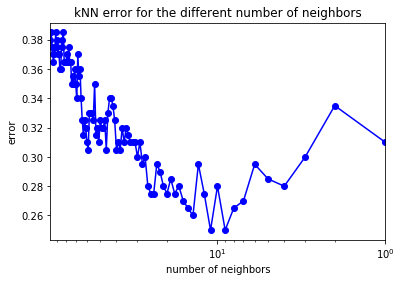

In [146]:
nn = [grid.cv_results_['params'][x]['n_neighbors'] for x in range(0, 99)]
scores = [(1 - x) for x in list(grid.cv_results_['mean_test_score'])]

plt.semilogx(nn, scores, 'b-o')
plt.xlim([np.max(nn), np.min(nn)])
plt.title('kNN error for the different number of neighbors')
plt.xlabel('number of neighbors')
plt.ylabel('error')
pass

In [150]:
# kNN, k = best found K
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train.values.ravel())

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train.values.ravel() != y_train_predict)
err_test  = np.mean(y_test.values.ravel()  != y_test_predict)

print(err_train, err_test)

0.2357142857142857 0.21666666666666667


# Naive Bayes

In [151]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train.values.ravel())

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

err_train = np.mean(y_train.values.ravel() != y_train_predict)
err_test  = np.mean(y_test.values.ravel()  != y_test_predict)

print(err_train, err_test)

0.16428571428571428 0.25
